# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: Nguyen Huong Giang LE

Student 2: Dwi Prima Handayani Putri

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [4]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [7]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [8]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [9]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [10]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [11]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [12]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [13]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [14]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [15]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [34]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

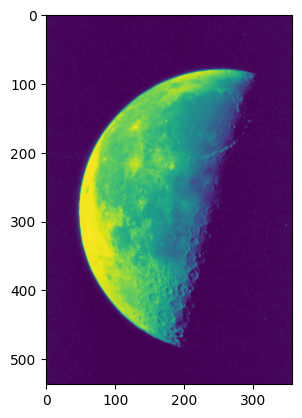

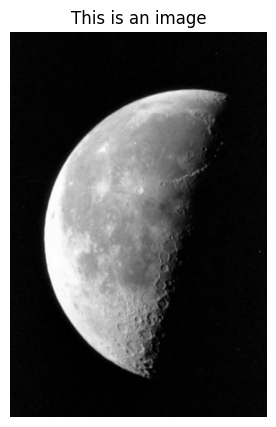

In [37]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [1]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    # open image
    myimage = np.array(Image.open(fname))
    return myimage
myimage = openImage('img/moon.png')
print(myimage)
    

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [2]:
import numpy as np
# First solution: For loop
def countPixels(I,k):
    """ Array*int -> int"""
    # initialize number of pixels have value k
    h = 0
    # change array -> vector
    Ivector = np.reshape(I,I.size).copy()
    # count number of pixels using for loop
    for i in range(I.size):
        if Ivector[i] == k:
            h +=1
    return h
# Test function
I = np.array([[0,1],[1,0]])
h = countPixels(I, 1)
print(h)

2


In [3]:
import numpy as np
#Second solution: numpy arithmetic
def countPixels2(I,k):
    """ Array*int -> int"""
    # change array I if pixel equal to k then value =1; else 0
    newI = np.where(I==k,1,0)
    # compute sum of new array I equal to number of pixels have value k
    h = newI.sum()
    return h
# Test function
I = np.array([[0,2,3,4,5,6],[2,0,0,1,3,4]])
h = countPixels2(I, 0)
print(h)

3


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [4]:
# Solution 1: For loop
import numpy as np
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    # change array -> vector
    Ivector = np.reshape(I,I.size).copy()
    # for loop if pixel have value k1 then change to k2
    for i in range(I.size):
        if Ivector[i] == k1:
            Ivector[i] = k2
    # change vector to original shape of array
    K = np.reshape(Ivector, (I.shape))
    return K
I = np.array([[0,1],[1,0]])
K = replacePixels(I, 1, 2)
print(I)
print(K)

[[0 1]
 [1 0]]
[[0 2]
 [2 0]]


In [5]:
#Second solution: numpy arithmetic
import numpy as np
def replacePixels2(I,k1,k2):
    """ Array*int*int -> Array """
    # replace k1 with k2 in I
    newI = np.where(I==k1,k2,I)
    return newI
# Test function
I = np.array([[0,1],[1,0]])
newI = replacePixels2(I,1,2)
print(I)
print(newI)

[[0 1]
 [1 0]]
[[0 2]
 [2 0]]


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [6]:
# First solution: For loop
import numpy as np
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    # compute max intensity and min intensity of I
    kmax = np.max(I)
    kmin = np.min(I)
    # reshape the array to vector and change type to float
    Ivector = np.float64(np.reshape(I,I.size).copy())
    # compute the normalize value with interval [k1,k2]
    for i in range(I.size):
        Ivector[i] = k1+(((Ivector[i]-kmin)*(k2-k1))/(kmax-kmin))
    # reshape vector to original shape of I
    K = np.reshape(Ivector, (I.shape))
    return K
# K = normalizeImage(myimage,0,253)
I = np.array([[0,5,11],[1,0,0]])
K = normalizeImage(I,1,2)
print(K)

[[1.        1.4545455 2.       ]
 [1.0909091 1.        1.       ]]


In [7]:
#Second solution: numpy arithmetic
import numpy as np
def normalizeImage2(I,k1,k2):
    """ Array*int*int -> Array """
    # compute max intensity and min intensity of I
    kmax = np.max(I)
    kmin = np.min(I)
    # compute the normalize value with interval [k1,k2]
    newI = k1+(((I-kmin)*(k2-k1))/(kmax-kmin))
    return newI
# Test function
I = np.array([[0,5,11],[1,0,0]])
K = normalizeImage2(I,1,2)
print(K)

[[1.         1.45454545 2.        ]
 [1.09090909 1.         1.        ]]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [8]:
# First solution: For loop
import numpy as np
def inverteImage(I):
    """ Array -> Array """
    # compute max intensity and min intensity of I
    kmax = np.max(I)
    kmin = np.min(I)
    # Compute dynamic range
    L = kmax - kmin + 1
    # k inverted = L - 1 - k
    Ivector = np.reshape(I,I.size).copy()
    for i in range(I.size):
        Ivector[i] = L - 1 - Ivector[i]
    K = np.reshape(Ivector, (I.shape))
    return K
I = np.array([[0,1],[1,0]])
K = inverteImage(I)
print(K)

[[1 0]
 [0 1]]


In [9]:
# Second solution: Numpy arithmetic
import numpy as np
def inverteImage2(I):
    """ Array -> Array """
    # compute max intensity and min intensity of I
    kmax = np.max(I)
    kmin = np.min(I)
    # Compute dynamic range
    L = kmax - kmin + 1
    # k inverted = L - 1 - k
    newI = L-1-I
    return newI
I = np.array([[0,255],[255,0]])
newI = inverteImage2(I)
print(newI)

[[255   0]
 [  0 255]]


6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [10]:
import numpy as np
def computeHistogram(I):
    """ Array -> list[int] """
    kmax = np.max(I)
    L = int(kmax + 1)
    # initialize H with array of zeros and size equal L
    H = np.zeros(L)
    
    # change array -> vector
    Ivector = np.int64(np.reshape(I,I.size).copy())
    # compute histogram
    for i in range(I.size):
        H[Ivector[i]] +=1
    return H
# use comments to answer to a verbal question
# Initialize Vector H to store the Histogram of the Image with the size of dynamic range.
# Then go through each pixel to take the value k and change the histogram of H(k)
I = np.array([[0,1],[1,5]])
H = computeHistogram(I)
print(H)

[1. 2. 0. 0. 0. 1.]


Is it possible to compute the histogram without explicitely visiting array pixels?
- it's not possible to compute the histogram without explicitely visiting array pixel because the function need to count the H for every k value by visiting all the pixels and increment the number of pixels have k value.


7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [27]:
# First solution: For loop
import numpy as np
def thresholdImage(I,s):
    """ Array*int -> Array """
    # change the array to vector
    Ivector = np.reshape(I,I.size).copy()
    # if the pixel value lower than s, set to 0
    # else set to 255
    for i in range(I.size):
        if Ivector[i] < s:
            Ivector[i] = 0
        elif Ivector[i]:
            Ivector[i] = 255
    # change the vector to original array shape
    K = np.reshape(Ivector, (I.shape))
    return K
I = np.array([[0,1,2,3,4],[5,6,7,8,9]])
K = thresholdImage(I, 5)
print(K)

[[  0   0   0   0   0]
 [255 255 255 255 255]]


In [28]:
# Second solution: Numpy arithmetic
import numpy as np
def thresholdImag2(I,s):
    """ Array*int -> Array """
    # replace pixel value to 0 if it lower than s
    # else replace it with 255
    K = np.where(I<s, 0, 255)
    return K
I = np.array([[0,1,2,3,4],[5,6,7,8,9]])
K = thresholdImage(I, 5)
print(K)

[[  0   0   0   0   0]
 [255 255 255 255 255]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

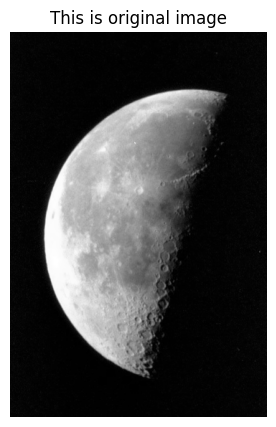

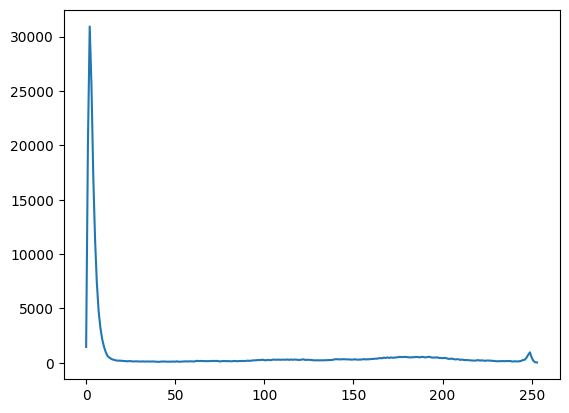

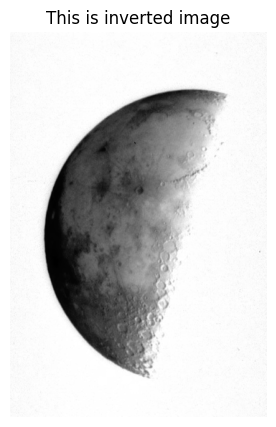

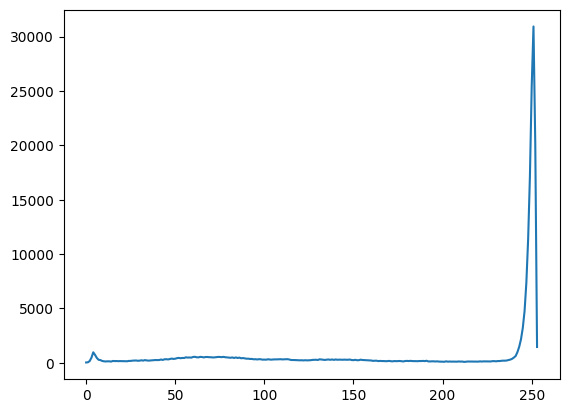

In [13]:
import matplotlib.pyplot as plt

## your code start below
# read image
myimage = openImage('img/moon.png')

# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is original image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

# compute histogram
H = computeHistogram(myimage)
plt.plot(H)

# inverse image
Iinverse = inverteImage(myimage)
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is inverted image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(Iinverse)
plt.show()

# plot histogram
H = computeHistogram(Iinverse)
plt.plot(H)

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

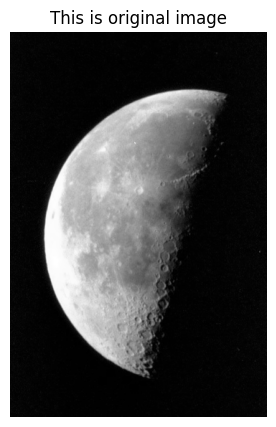

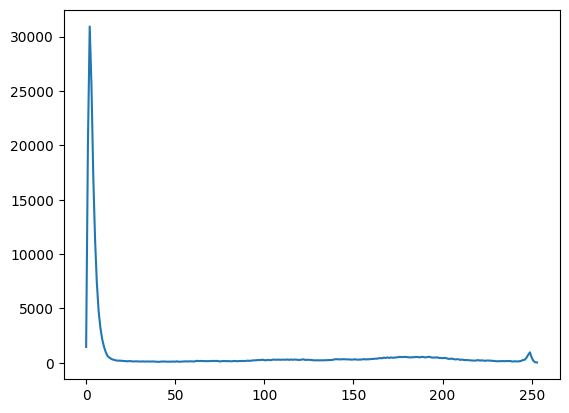

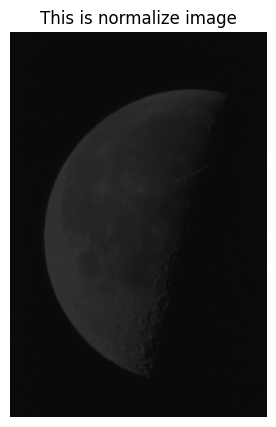

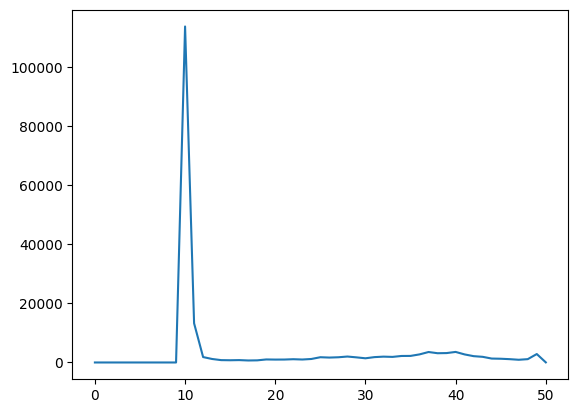

In [30]:
import matplotlib.pyplot as plt
# read image
myimage = openImage('img/moon.png')

# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is original image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

# compute histogram
H = computeHistogram(myimage)
plt.plot(H)

# normalize image to interval [10,50]
Inormalize = normalizeImage(myimage,10,50)
Hnormalize = computeHistogram(Inormalize)

# display normalize image and plot histogram
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is normalize image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(Inormalize, vmin=0,vmax=255)
plt.show()

plt.plot(Hnormalize)

We can see in the histogram that the image is normalized to [10,50] from [0,255]. That means the dynamic range has changed.

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


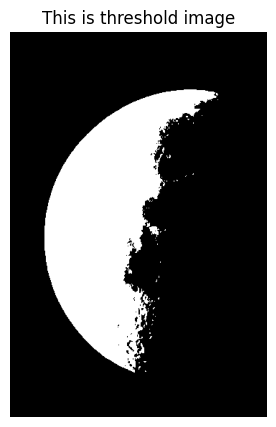

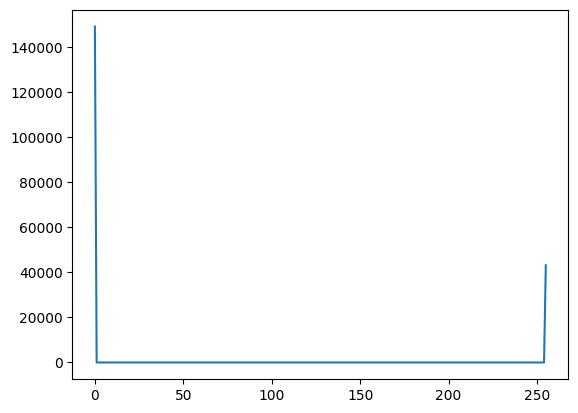

In [15]:
import matplotlib.pyplot as plt
# binarization
Ibin = thresholdImage(myimage,127)
Hbin = computeHistogram(Ibin)
print(Ibin)
# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is threshold image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(Ibin)
plt.show()

# display histogram
plt.plot(Hbin)


We could see after using binarization thresholding, the image only has 2 values: 0 and 255. 

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> <img src="attachment:synthese.png" width="150"/> </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

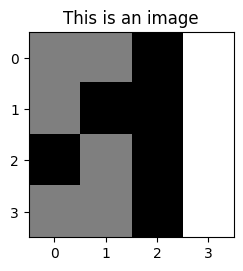

In [31]:
import numpy as np
import matplotlib.pyplot as plt
# image in bima.png
# gray:127, black:0, white:255
image = np.array([[127,127,0,255],
                 [127,0,0,255],
                 [0,127,0,255],
                 [127,127,0,255]])

#display image
w,h=400,400
plt.figure(figsize=(w/150,h/150))
plt.gray()
plt.title('This is an image')
plt.imshow(image)
plt.show()


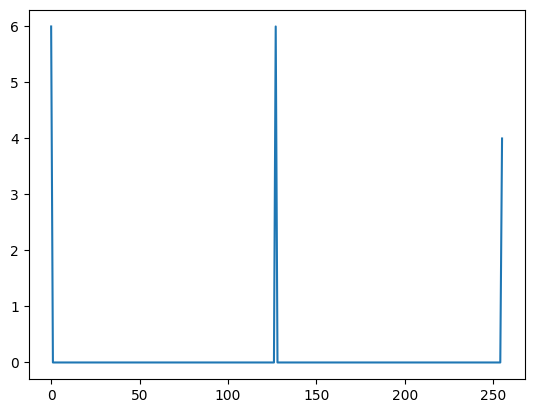

In [25]:
# compute histogram of image
h = computeHistogram(image)
plt.plot(h)

2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1]$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

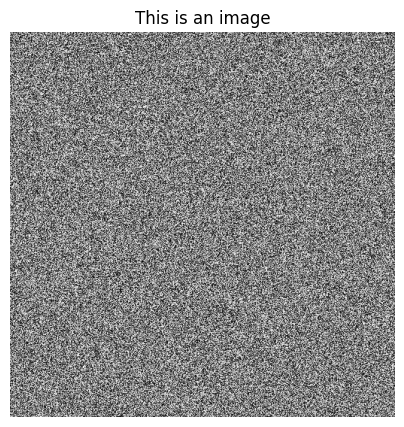

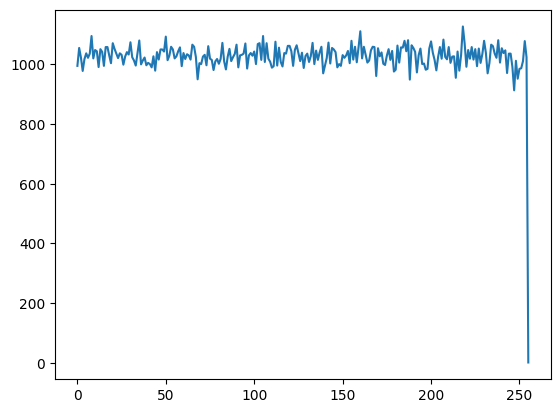

In [34]:
import numpy as np
# Create int arr[512][512] uniform distribution with interval [0,1]
M = np.random.rand(512,512)
# change array to interval [0,255]
Mnormalized = normalizeImage(M,0,255)
image = Mnormalized
# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(image)
plt.show()
# compute histogram
h = computeHistogram(image)
plt.plot(h)


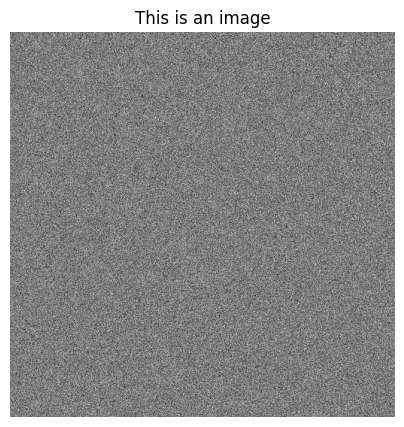

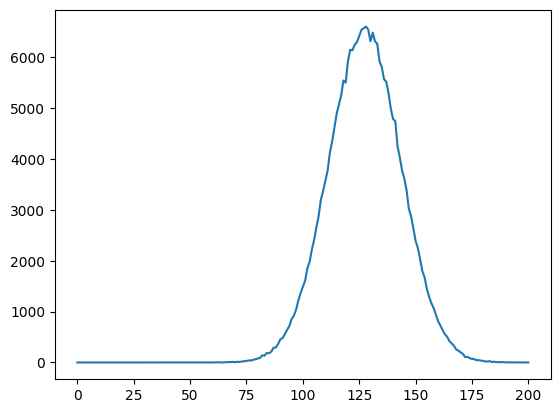

In [36]:
# Create int arrray with Gaussian distribution with mean 128 and standard deviation of 16
image = np.random.normal(loc=128, scale=16, size=(512,512))
# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(image)
plt.show()
# compute histogram
h = computeHistogram(image)
plt.plot(h)

## Discuss the results:
- Uniform distribution: The histogram was distributed nearly equally.
- Gaussian(normal) distribution: The histogram peaks at the mean (128) and decreases as the values move away from the mean

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

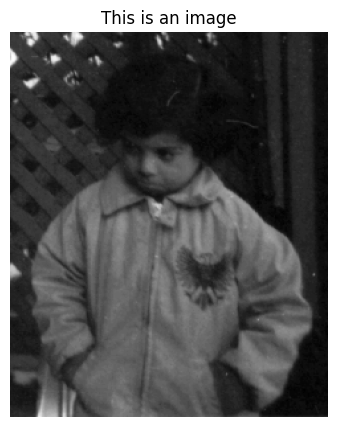

In [80]:
from PIL import Image
pout = np.array(Image.open("img/pout.png"))
# display image
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(pout)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

224
74


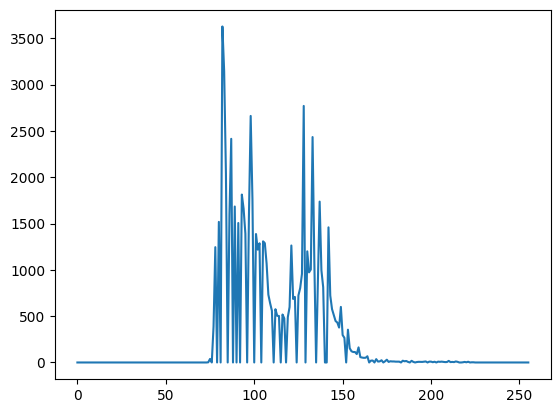

In [81]:
# compute histogram
h = np.zeros(256)
Ivector = np.int64(np.reshape(pout,pout.size).copy())
# compute histogram
for i in range(Ivector.size):
    h[Ivector[i]] +=1
# h = computeHistogram(pout)
plt.plot(h)
# determine extrema
max = np.max(pout)
min = np.min(pout)
print(max)
print(min)

## Image quality
- Contrast: C = max-min/max+min = 0.503355. It's medium contrast
- Dynamic Range: L = max-min+1 = 151. It's medium dynamic range
- The histogram is in the middle => Not too bright or too dark

=> Image has medium quality

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

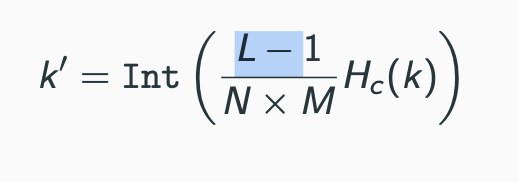

In [82]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    hc = np.zeros(h.size) # cummulative histogram
    temp = 0
    # Compute cummulative histogram
    for i in range(h.size):
        temp = temp + h[i] 
        hc[i] = temp

    Ivector = np.reshape(I,I.size).copy()
    # compute histogram equalization for interval[0,255]
    for i in range(I.size):
       Ivector[i] = int((255)/(I.size)*hc[Ivector[i]])
    K = np.reshape(Ivector, I.shape)
    return K

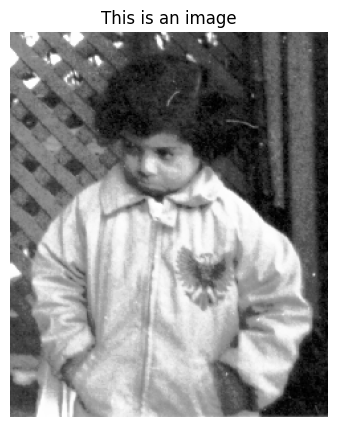

In [83]:
# test equalization on pout
newPout = histogramEqualization(pout,h)
# display image
plt.figure(figsize=(400/80,400/80))  # optional, to control the size of figure (unit: pixel)
# plt.gray() # optional call to display image using a gray colormap
plt.title('This is equalization image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(newPout)
plt.show()

255
0


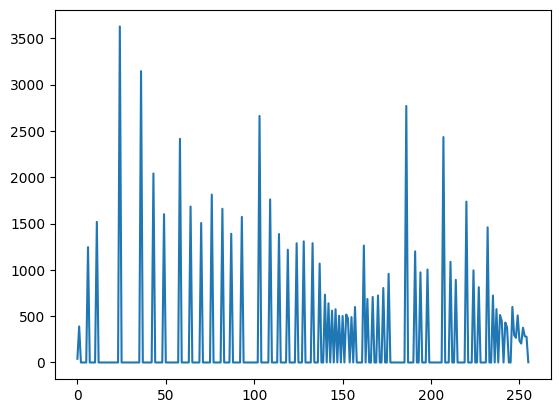

In [85]:
H = np.zeros(256)
Ivector = np.int64(np.reshape(newPout,newPout.size).copy())
# compute histogram
for i in range(Ivector.size):
    H[Ivector[i]] +=1
# he = computeHistogram(newPout)
plt.plot(H)
print(newPout.max())
print(newPout.min())

## Discuss the results:
- The distribution and dynamic range is spreading and equalizing.
- Giving higher contrast, meaning the histogram equalization improve image quality.